In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_excel('data/UAE_Population_data.xlsx') # Load the dataset

In [8]:
data.head() # to view the first few rows of the dataset.

,location_name,age_group_name,sex,year,value
0,United Arab Emirates,Early Neonatal,Male,1950,39
1,United Arab Emirates,Early Neonatal,Male,1951,35
2,United Arab Emirates,Early Neonatal,Male,1952,36
3,United Arab Emirates,Early Neonatal,Male,1953,37
4,United Arab Emirates,Early Neonatal,Male,1954,37


In [10]:
data.info() # understand the summary of the data types and any missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   location_name   5256 non-null   object
 1   age_group_name  5256 non-null   object
 2   sex             5256 non-null   object
 3   year            5256 non-null   int64 
 4   value           5256 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 205.4+ KB


In [12]:
data.describe() # To check basic statistics.

,year,value
count,5256.000000,5.256000e+03
mean,1986.000000,1.613840e+05
std,21.073312,6.757261e+05
min,1950.000000,1.000000e+00
25%,1968.000000,9.990000e+02
50%,1986.000000,7.128500e+03
75%,2004.000000,8.728450e+04
max,2022.000000,9.365196e+06


In [18]:
missing_values = data.isnull().sum() # Checking for missing values
missing_values

location_name     0
age_group_name    0
sex               0
year              0
value             0
dtype: int64

# 1. Population Growth Over Time by Gender
## Visualization: 
Line plot showing population growth over time for both males and females.


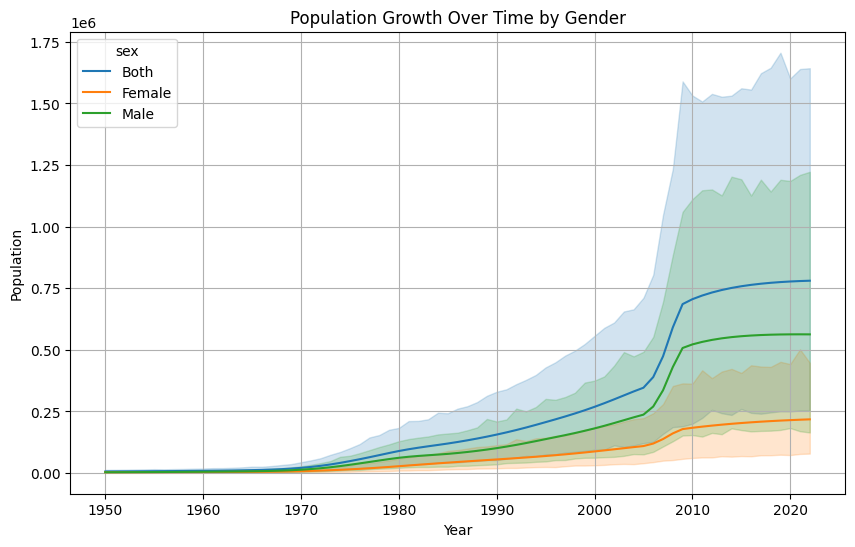

In [22]:
# Group data by year, gender, and age group for detailed analysis
population_trends = data.groupby(['year', 'sex', 'age_group_name'])['value'].sum().reset_index()

# Visualizing population trends over time by gender
plt.figure(figsize=(10, 6))
sns.lineplot(data=population_trends, x='year', y='value', hue='sex')
plt.title('Population Growth Over Time by Gender')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()

## Insights:
The population of the UAE has steadily increased over the years.
There is a larger male population compared to the female population. This trend is likely driven by the influx of male migrant workers who come to the UAE for employment.
The gender gap is more pronounced in recent decades, with the male population growing significantly faster than the female population, especially in the working-age group.

## 2. Population Distribution by Age Group and Gender (Latest Year)
# Visualization: 
Bar chart showing population distribution by age group for males and females in the most recent year.

In [24]:
# Visualizing population distribution by age group in the most recent year
latest_year = data['year'].max()
latest_data = data[data['year'] == latest_year]

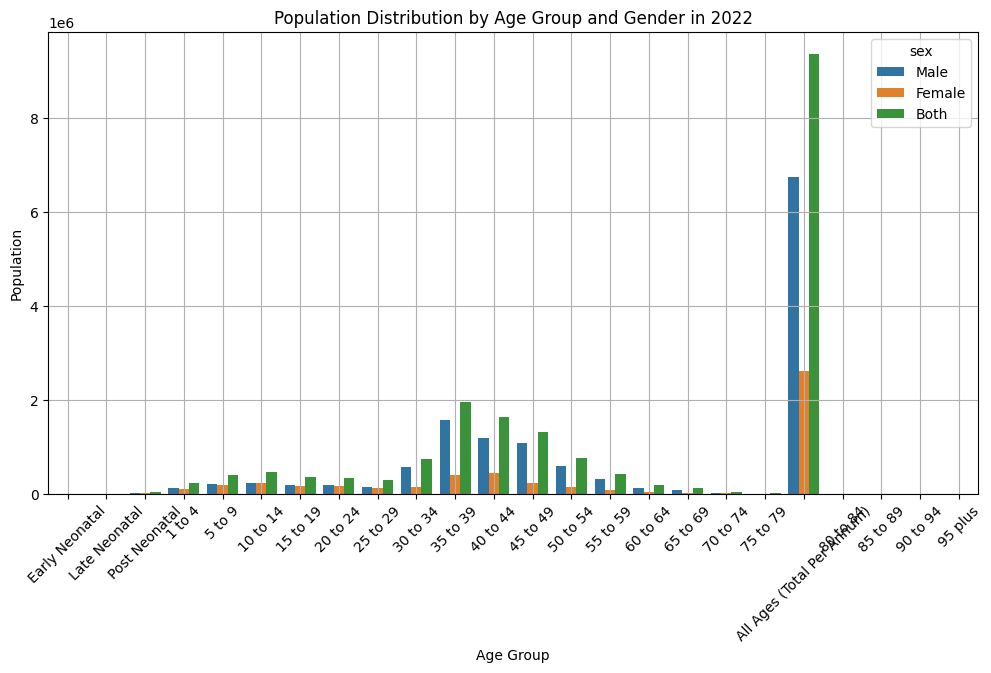

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=latest_data, x='age_group_name', y='value', hue='sex')
plt.xticks(rotation=45)
plt.title(f'Population Distribution by Age Group and Gender in {latest_year}')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.grid(True)
plt.show()

## Insights:
In the most recent year (e.g., 2022), the working-age population (ages 20–50) is the largest segment for both males and females.
The elderly population (above 60) remains relatively small, indicating that the UAE has a younger demographic overall.
There are more males in almost every age group, but the disparity is particularly high in the working-age population, again due to labor migration.
The younger age groups (children) have a more balanced male-to-female ratio, indicating natural population growth among residents.


# 3. Population Trends by Age Group Over Time
## Visualization: 
Line plot showing how different age groups have grown over time.

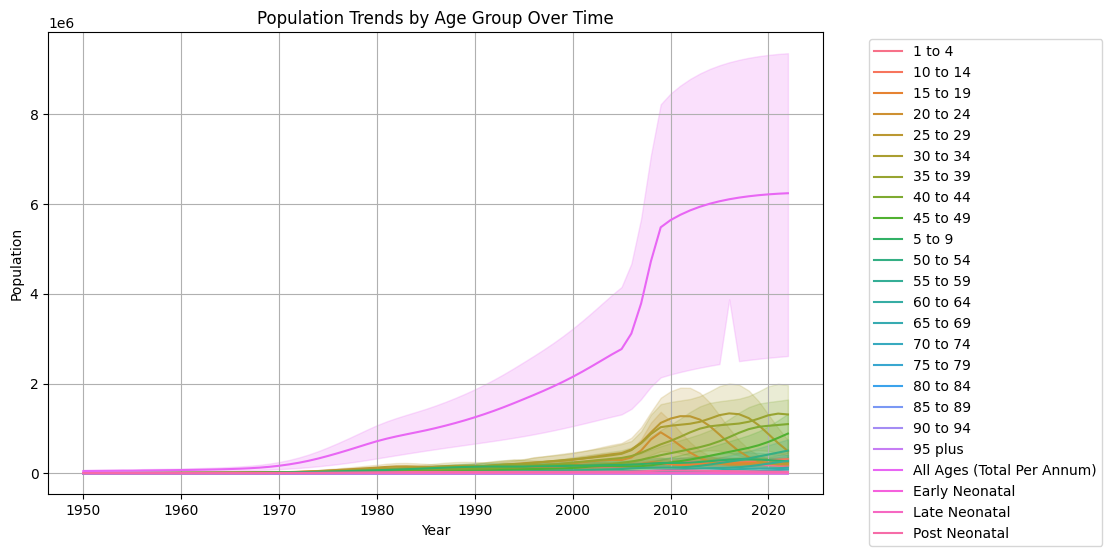

In [28]:
# Population trends by age group over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=population_trends, x='year', y='value', hue='age_group_name')
plt.title('Population Trends by Age Group Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Insights:
The adult working-age population (20–50) has shown the most significant growth over the years, highlighting the UAE’s increasing reliance on a foreign labor force.
The younger population (below 20) is growing at a slower pace, indicating that the natural growth of the population (birth rates) is not the primary driver of overall population increase.
The elderly population (above 60) remains a relatively small group, though it shows a slight increase in recent years due to the aging of the existing population.

# 4. Total Population Distribution by Age Group Across All Years
## Visualization: 
Bar chart showing the total population distributed across age groups.

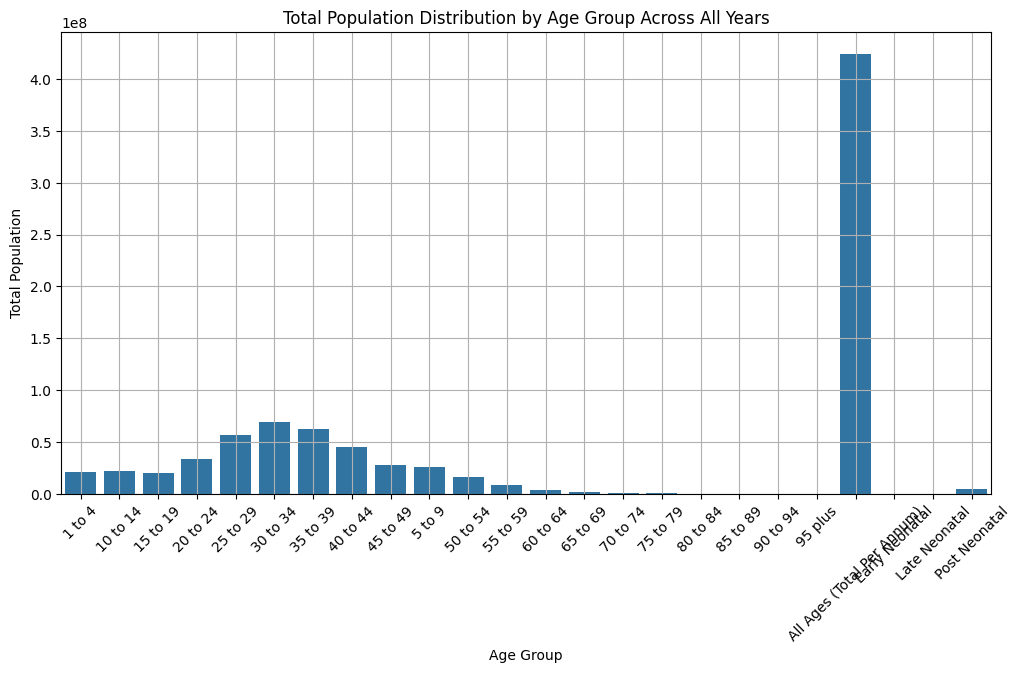

In [38]:
# Visualizing total population by age group across all years
age_group_distribution = data.groupby('age_group_name')['value'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=age_group_distribution, x='age_group_name', y='value')
plt.xticks(rotation=45)
plt.title('Total Population Distribution by Age Group Across All Years')
plt.xlabel('Age Group')
plt.ylabel('Total Population')
plt.grid(True)
plt.show()

## Insights:
The largest population segment overall is the working-age group (20–50), which reflects the economic and labor dynamics of the UAE.
The younger population (below 20) is smaller in comparison, which could indicate lower birth rates or a lower proportion of dependents in the population.
The elderly population remains small but is slowly growing, indicating that people are either aging in the UAE or that the aging population is being retained in the country.

# 5. Overall Gender Distribution
## Visualization: 
Pie chart showing the overall gender distribution in the dataset.

In [36]:
# Gender distribution
gender_distribution = data.groupby('sex')['value'].sum().reset_index()
gender_distribution

,sex,value
0,Both,424117129
1,Female,123572963
2,Male,300544160


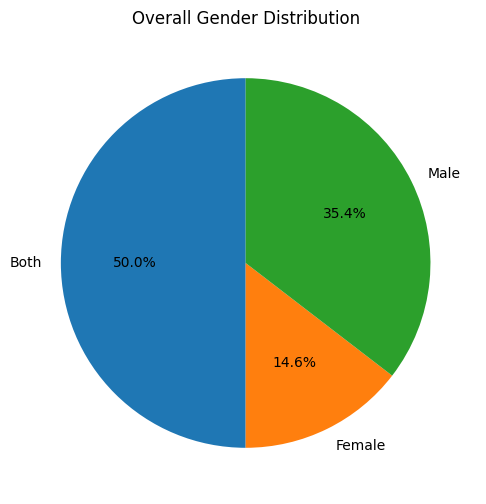

In [46]:
# Plotting the pie chart using matplotlib
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution['value'], labels=gender_distribution['sex'], autopct='%1.1f%%', startangle=90)
plt.title('Overall Gender Distribution')
plt.show()

# Insights:
Males make up a significantly larger portion of the population than females. 
This is common in the UAE due to the influx of male workers, especially in industries like construction and services.
The gender imbalance is a result of economic factors and immigration policies, as the UAE attracts many foreign workers, the majority of whom are male.


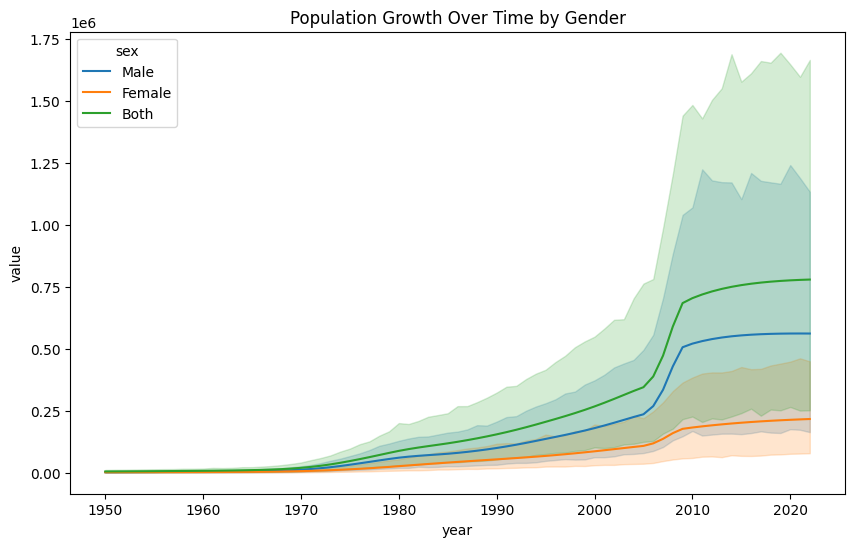

In [14]:
# Visualizing population growth over time

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='value', hue='sex')
plt.title('Population Growth Over Time by Gender')
plt.show()

# Overall Analysis and Conclusions:
1.Population growth in the UAE is driven largely by immigration and the influx of foreign workers, particularly males in the working-age groups (20–50 years). The male population has been growing at a faster rate than the female population due to labor demand.

2.The younger age groups (below 20) and elderly population (above 60) are significantly smaller compared to the working-age population, suggesting a workforce-driven demographic structure.

3.The UAE's population is relatively young, with a strong concentration in the economically productive age groups. This may reflect the country’s focus on building a workforce to support its growing economy.

4.The gender disparity in the population suggests that immigration policies favor male workers, and natural population growth (i.e., birth rates) plays a smaller role in the country’s overall demographic expansion.

5.The elderly population is starting to grow slightly, which could indicate changes in the long-term retention of workers or the aging of expatriate populations.